In [10]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.1 MB/s eta 0:00:00


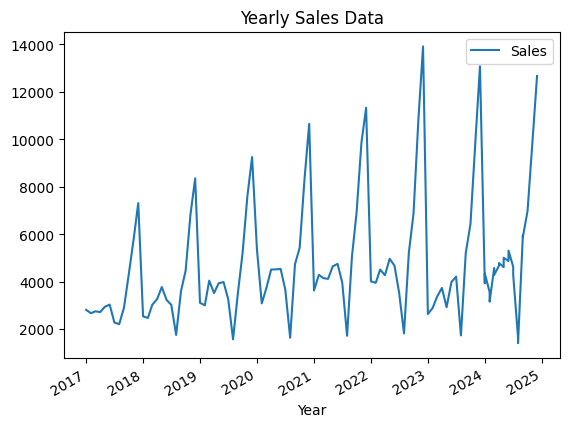

ADF Test result: (0.01, False)
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=563.896, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=562.739, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=560.756, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=562.740, Time=0.05 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=557.899, Time=0.04 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=559.654, Time=0.08 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=559.648, Time=0.17 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(3,1,0)(0,1,0)[12]             : AIC=559.097, Time=0.04 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.09 sec
 ARIMA(3,1,1)(0,1,0)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(2,1,0)(0,1,0)[12] i

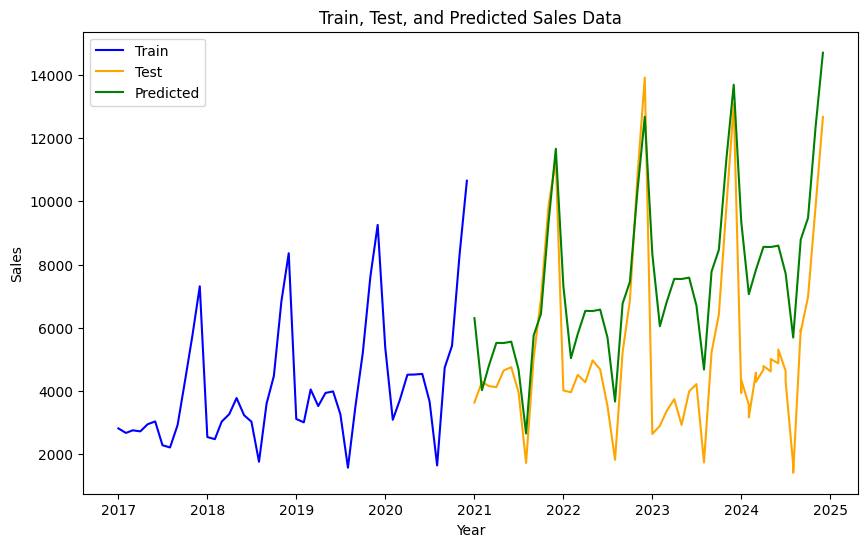

In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

# Load the dataset
df = pd.read_csv('year_sales.csv')

# Convert 'Year' to datetime format and set as index
df['Year'] = pd.to_datetime(df['Year'])
df.set_index('Year', inplace=True)

# Sort the DataFrame by Year to ensure proper slicing
df = df.sort_index()

# Plot the entire dataset
df.plot()
plt.title("Yearly Sales Data")
plt.show()

# Perform the ADF Test to check stationarity
adf_test = ADFTest(alpha=0.05)
result = adf_test.should_diff(df)
print(f"ADF Test result: {result}")

# Split data into train (up to 2020) and test (from 2021 onwards)
train = df[:'2020']
test = df['2021':]

# Train the ARIMA model on the train data
model = auto_arima(train, start_p=0, d=1, start_q=0,
                   max_p=5, max_d=5, max_q=5,
                   start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                   m=12, seasonal=True, error_action='warn',
                   trace=True, suppress_warnings=True, stepwise=True,
                   random_state=20, n_fits=50)

# Print model summary
print(model.summary())

# Predict the values for the test set
predictions = pd.DataFrame(model.predict(n_periods=len(test)),
                           index=test.index)
predictions.columns = ['Predicted']

# Plot the train, test, and predicted data
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Test', color='orange')
plt.plot(predictions, label='Predicted', color='green')
plt.title("Train, Test, and Predicted Sales Data")
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()
